# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_experiment_data = pd.merge(mouse_metadata, study_results, how = "right", on = "Mouse ID")

# Display the data table for preview
combined_experiment_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [119]:
# Checking the number of mice.
mice_number = len(combined_experiment_data["Mouse ID"].unique())
mice_number

249

In [95]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice = combined_experiment_data[combined_experiment_data.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]
duplicated_mouse_ids = duplicated_mice["Mouse ID"].unique()
print(duplicated_mouse_ids)


['g989']


In [96]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = combined_experiment_data[combined_experiment_data["Mouse ID"].isin(duplicated_mouse_ids)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [97]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data =combined_experiment_data[combined_experiment_data["Mouse ID"]!= "g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [98]:
# Checking the number of mice in the clean DataFrame.
new_mice_number=len(clean_data["Mouse ID"].unique())
new_mice_number

248

## Summary Statistics

In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std.Dev": std_dev_tumor,
    "Tumor Volume Std. Err": sem_tumor
})


stats






,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

stats_agg = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean = "mean",
    median = "median", 
    var = "var", 
    std = "std", 
    sem = "sem"
)


stats_agg.columns.name = "Tumor Volume (mm3)"

stats_agg


Tumor Volume (mm3),mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

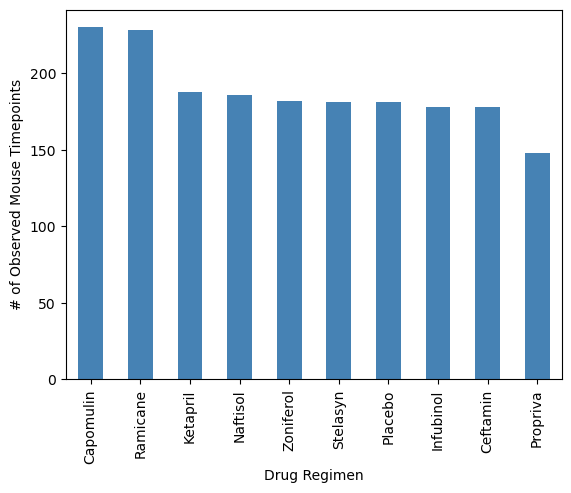

In [102]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = clean_data["Drug Regimen"].value_counts()

bar_plot = drug_counts.plot(kind = "bar", facecolor="steelblue", 
                           xlabel = "Drug Regimen", 
                           ylabel = "# of Observed Mouse Timepoints")

plt.show()


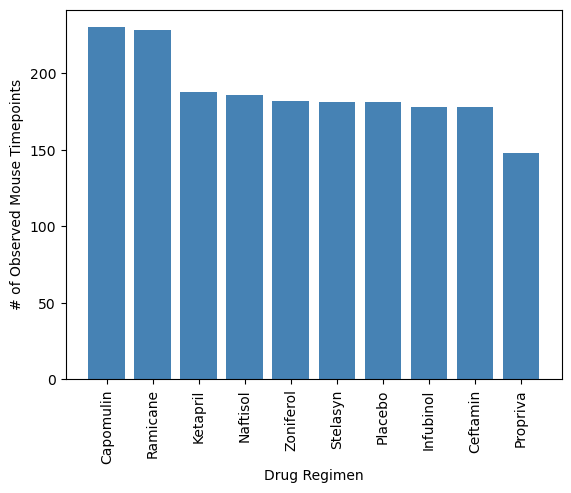

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = clean_data["Drug Regimen"].value_counts()

plt.bar(drug_counts.index, drug_counts.values, color="steelblue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()



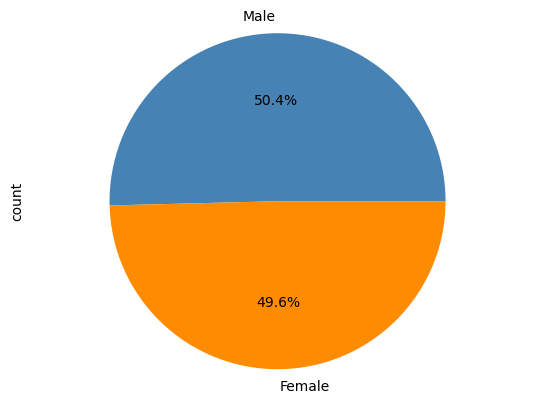

In [104]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data[["Mouse ID","Sex"]].drop_duplicates()

# Make the pie chart
unique_mice_gender = unique_mice["Sex"].value_counts()

mice_gender_piechart = unique_mice_gender.plot(kind = "pie", autopct="%1.1f%%", colors=["steelblue", "darkorange"])
mice_gender_piechart.set_ylabel("count")
plt.axis("equal")
plt.show()




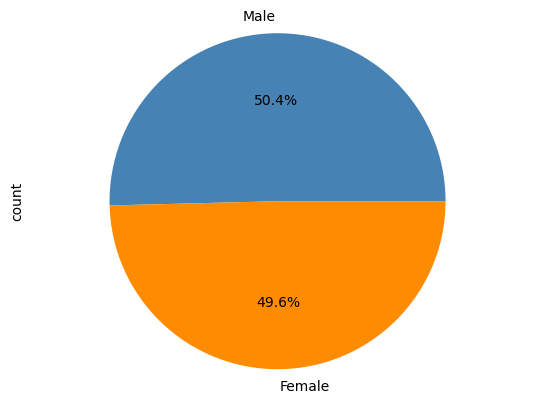

In [105]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data[["Mouse ID","Sex"]].drop_duplicates()

# Make the pie chart
unique_mice_gender = unique_mice["Sex"].value_counts()


plt.pie(unique_mice_gender, labels = unique_mice_gender.index, colors=["steelblue", "darkorange"],
        autopct = "%1.1f%%")
plt.ylabel("count")
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
data = clean_data[clean_data["Drug Regimen"].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_data = pd.merge(last_timepoint, data, on= ["Mouse ID", "Timepoint"])
tumor_volume_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [107]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = tumor_volume_data[tumor_volume_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    # add subset
    tumor_vol_data.append(subset)


    # Determine outliers using upper and lower bounds
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]

    print(f"{treatment} Tumor Volume Data:")
    
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    print(f"Potential Outliers: {outliers.values}\n")



Capomulin Tumor Volume Data:
Q1: 32.37735684, Q3: 40.1592203, IQR: 7.781863460000004
Lower Bound: 20.70456164999999, Upper Bound: 51.83201549
Potential Outliers: []

Ramicane Tumor Volume Data:
Q1: 31.56046955, Q3: 40.65900627, IQR: 9.098536719999998
Lower Bound: 17.912664470000003, Upper Bound: 54.30681135
Potential Outliers: []

Infubinol Tumor Volume Data:
Q1: 54.04860769, Q3: 65.52574285, IQR: 11.477135160000003
Lower Bound: 36.83290494999999, Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]

Ceftamin Tumor Volume Data:
Q1: 48.72207785, Q3: 64.29983003, IQR: 15.577752179999997
Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999
Potential Outliers: []



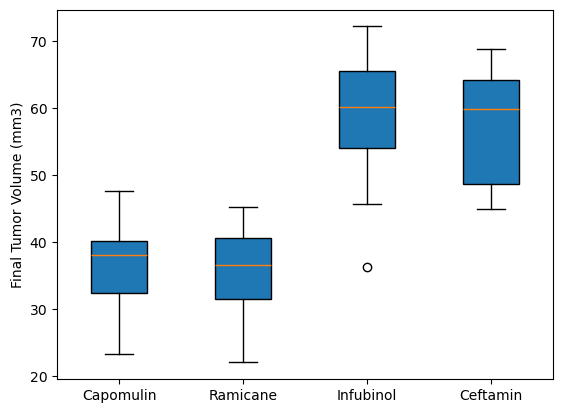

In [108]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, tick_labels = treatment_regimens,
            patch_artist = True)

plt.ylabel("Final Tumor Volume (mm3)")

plt.show()





## Line and Scatter Plots

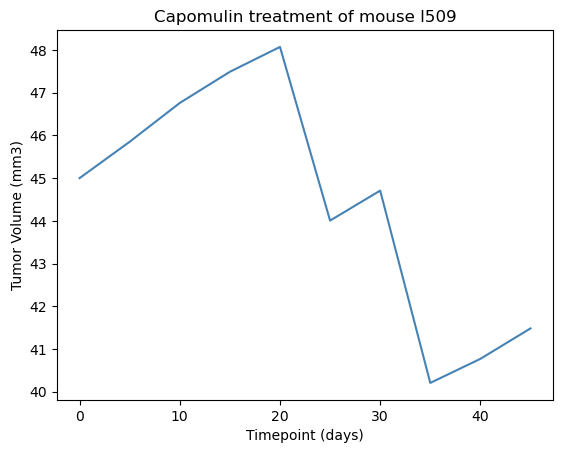

In [109]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"

capomulin_data = clean_data[clean_data["Mouse ID"] == mouse_id]

plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], color = "steelblue")

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


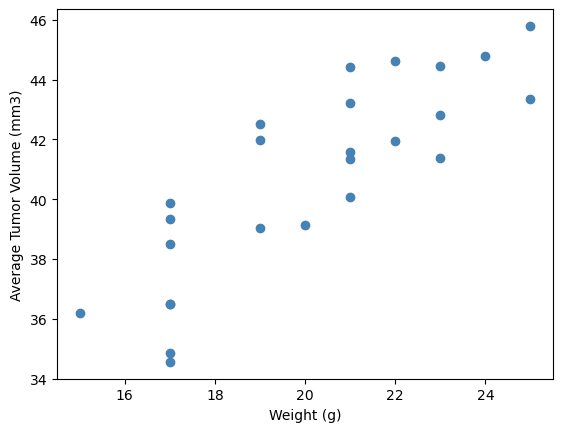

In [110]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Filter for the Capomulin Regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

#Calculate the average tumor volume for each mouse

avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

#Creat the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, color = "steelblue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()





## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


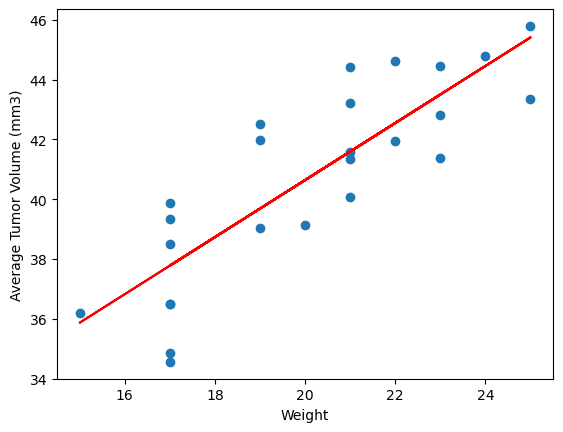

In [124]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


correlation = st.pearsonr(mouse_weight, avg_tumor_volume)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]


x_values = mouse_weight 
y_values = avg_tumor_volume

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

